# Deep Learning for Geo/Environmental sciences

<center><img src="../logo_2.png" alt="logo" width="500"/></center>

<em>*Created with ChapGPT</em>

## Lecture 8: Object detection and semantic segmentation

 - [Recap](#Recap)
 - [Object Detection](#Object-Detection)
 - [Semantic Segmentation](#Semantic-Segmentation)

This tutorial is modified from
- fchollet's [Image segmentation with a U-Net-like architecture](https://keras.io/examples/vision/oxford_pets_image_segmentation/) example
- Luke Wood's [Object Detection with KerasCV](https://keras.io/guides/keras_cv/object_detection_keras_cv/)

## Recap - Classification

Last week we introduced the concept of image classification. We learned how to train a deep learning model to classify images into different categories. 

We used the MNIST dataset, which contains images of handwritten digits and trained a convolutional neural network (CNN) to classify these images into one of ten categories (0-9).

## Recap - Classification

We learned about the softmax activation function, which is used to convert the output of the model into a probability distribution over the different classes: 

$$\text{softmax}(x)_i = \frac{e^{x_i}}{\sum_{j} e^{x_j}}$$

where $x$ is the output of the model for a given input image, and $i$ indexes the different classes.

## Recap - Classification


We also learned about the categorical cross-entropy loss function, which is used to measure the difference between the predicted probability distribution and the true distribution of the labels:

Categorical Cross-Entropy = $-\sum_{i=1}^{N} y_i \log(p_i)$

where $y_i$ is the true distribution of the labels, $p_{i}$ is the predicted distribution of the labels, and $i$ indexes the different classes.


## Recap - Classification

We discussed class imbalance and how it can affect the training of the model. We learned about techniques such as class weighting and data augmentation to address this issue.

You also explored a real-world example of image classification using Jeff's Plankton dataset and (hopefully!) trained a model to classify images of plankton into different categories.

## Object Detection

Unlike classification, object detection is a more challenging task that involves localizing objects in images. The goal is to detect the presence of objects in an image and locate them.

Some key concepts in object detection include:
- **Bounding box**: A rectangle that encloses an object in an image.
- **Anchor box**: A set of predefined bounding boxes of different sizes and aspect ratios that are used to detect objects of different sizes and shapes.
- **Intersection over Union (IoU)**: A metric that measures the overlap between two bounding boxes. It is calculated as the area of intersection divided by the area of the union of the two bounding boxes.

### Bounding box

The bounding box is a rectangle that encloses an object in an image. It is defined by its top-left corner (x, y) and its width and height (w, h). The coordinates of the bounding box are usually normalized to the range [0, 1], where (0, 0) is the top-left corner of the image and (1, 1) is the bottom-right corner.

<img src="_images/bounding_box.png" width="200">

### Anchor boxes

Anchor boxes are a set of predefined bounding boxes of different sizes and aspect ratios that are used to detect objects of different sizes and shapes. By using anchor boxes, the model can predict multiple bounding boxes for each object in the image, which helps improve the accuracy of object detection.

<img src="_images/anchor_boxes.jpg" width="400">

The model predicts the offsets (dx, dy, dw, dh) for each anchor box to adjust its position and size to better fit the object in the image. This turns the problem of object detection into a regression problem, where the model learns to predict the offsets for each anchor box.

### Intersection over Union (IoU)

Intersection over Union (IoU) is a metric that measures the overlap between two bounding boxes. It is calculated as the area of intersection divided by the area of the union of the two bounding boxes:

<img src="_images/iou_equation.png" width="200">

A value of 1 indicates a perfect overlap between the two bounding boxes, while a value of 0 indicates no overlap. 0.5 is often used as a threshold to determine whether two bounding boxes are considered a match.

<img src="_images/iou_examples.png" width="400">

### Important object detection algorithms

Some popular object detection algorithms include:
- **YOLO (You Only Look Once)**: A real-time object detection algorithm that divides the image into a grid and predicts bounding boxes and class probabilities for each grid cell.
- **Faster R-CNN (Region-based Convolutional Neural Network)**: A two-stage object detection algorithm that uses a region proposal network to generate candidate bounding boxes and a classification network to predict the class and refine the bounding boxes.
- **SSD (Single Shot MultiBox Detector)**: A single-stage object detection algorithm that predicts bounding boxes and class probabilities for multiple object categories at different scales.

YOLO is known for its speed and simplicity, while Faster R-CNN and SSD are known for their accuracy and flexibility.

## Semantic Segmentation

Semantic segmentation is the task of classifying each pixel in an image into a specific category or class. Unlike object detection, which localizes objects with bounding boxes, semantic segmentation assigns a class label to each pixel in the image.

Semantic segmentation is a challenging task that requires understanding the context and spatial relationships between pixels in an image. It is commonly used in applications such as image segmentation, scene understanding, and autonomous driving.

## U-Net

A popular architecture for semantic segmentation is the U-Net. The U-NET is a convolutional neural network that was developed for biomedical image segmentation at the Computer Science Department of the University of Freiburg, Germany.  

The architecture consists of a contracting path to capture context and a symmetric expanding path that enables precise localization. The network is composed of a contracting path and an expansive path, which gives it the U-shape. 

The contracting path (encoder) follows the typical architecture of a convolutional network, with convolutional and max-pooling layers. The expansive pathway (decoder) combines the feature information and the localization information of the image. 


The encoder extracts features from the input image, while the decoder generates a segmentation mask by upsampling the features and combining them with skip connections from the encoder.

<img src="_images/UNet_architecture.jpg" width="600">

The skip connections help preserve spatial information and improve the segmentation accuracy by combining low-level and high-level features. The U-Net architecture has been widely used in medical image analysis, satellite image segmentation, and other applications that require pixel-level classification.

## Image segmentation example

Let's see an example of semantic segmentation using a U-Net-like architecture. We will train a model to segment images of pets into different categories (background, cat, dog) using the Oxford-III Pet Dataset.

### Prepare paths of input images and target segmentation masks

In [1]:
import os

In [6]:
DATA_PATH = '/Users/watson-parris/Library/CloudStorage/GoogleDrive-dwatsonparris@ucsd.edu/Shared drives/CAL Shared Data/SIOC-209 Data/oxford_pets/'
input_dir = DATA_PATH + "images/"
target_dir = DATA_PATH + "annotations/trimaps/"
img_size = (160, 160)
num_classes = 3
batch_size = 32

In [7]:
input_img_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".jpg")
    ]
)
target_img_paths = sorted(
    [
        os.path.join(target_dir, fname)
        for fname in os.listdir(target_dir)
        if fname.endswith(".png") and not fname.startswith(".")
    ]
)

In [8]:
print("Number of samples:", len(input_img_paths))

Number of samples: 7467


In [9]:
for input_path, target_path in zip(input_img_paths[:10], target_img_paths[:10]):
    print(input_path, "|", target_path)

/Users/watson-parris/Library/CloudStorage/GoogleDrive-dwatsonparris@ucsd.edu/Shared drives/CAL Shared Data/SIOC-209 Data/oxford_pets/images/Abyssinian_1.jpg | /Users/watson-parris/Library/CloudStorage/GoogleDrive-dwatsonparris@ucsd.edu/Shared drives/CAL Shared Data/SIOC-209 Data/oxford_pets/annotations/trimaps/Abyssinian_1.png
/Users/watson-parris/Library/CloudStorage/GoogleDrive-dwatsonparris@ucsd.edu/Shared drives/CAL Shared Data/SIOC-209 Data/oxford_pets/images/Abyssinian_10.jpg | /Users/watson-parris/Library/CloudStorage/GoogleDrive-dwatsonparris@ucsd.edu/Shared drives/CAL Shared Data/SIOC-209 Data/oxford_pets/annotations/trimaps/Abyssinian_10.png
/Users/watson-parris/Library/CloudStorage/GoogleDrive-dwatsonparris@ucsd.edu/Shared drives/CAL Shared Data/SIOC-209 Data/oxford_pets/images/Abyssinian_100.jpg | /Users/watson-parris/Library/CloudStorage/GoogleDrive-dwatsonparris@ucsd.edu/Shared drives/CAL Shared Data/SIOC-209 Data/oxford_pets/annotations/trimaps/Abyssinian_100.png
/Users/



## What does one input image and corresponding segmentation mask look like?


In [10]:
from IPython.display import Image, display
from keras.utils import load_img
from PIL import ImageOps

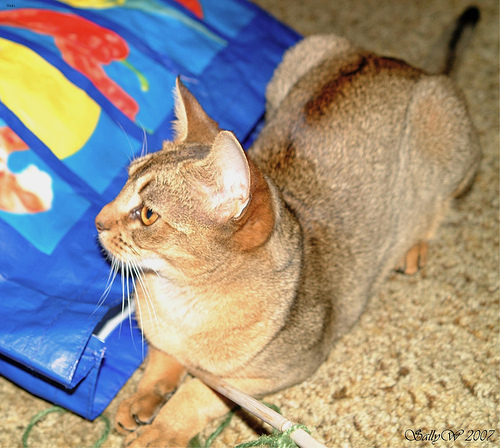

In [11]:
display(Image(filename=input_img_paths[9]))

Display auto-contrast version of corresponding target (per-pixel categories)

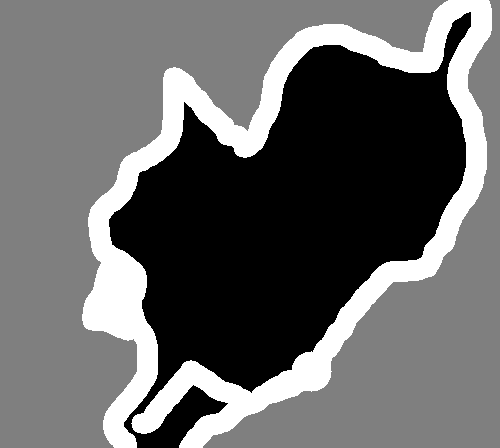

In [12]:
img = ImageOps.autocontrast(load_img(target_img_paths[9]))
display(img)



## Prepare dataset to load & vectorize batches of data


In [13]:
import keras
import numpy as np
from tensorflow import data as tf_data
from tensorflow import image as tf_image
from tensorflow import io as tf_io

In [14]:
def get_dataset(
    batch_size,
    img_size,
    input_img_paths,
    target_img_paths,
    max_dataset_len=None,
):
    """Returns a TF Dataset."""
    def load_img_masks(input_img_path, target_img_path):
        input_img = tf_io.read_file(input_img_path)
        input_img = tf_io.decode_png(input_img, channels=3)
        input_img = tf_image.resize(input_img, img_size)
        input_img = tf_image.convert_image_dtype(input_img, "float32")
        target_img = tf_io.read_file(target_img_path)
        target_img = tf_io.decode_png(target_img, channels=1)
        target_img = tf_image.resize(target_img, img_size, method="nearest")
        target_img = tf_image.convert_image_dtype(target_img, "uint8")

        # Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
        target_img -= 1
        return input_img, target_img

    # For faster debugging, limit the size of data
    if max_dataset_len:
        input_img_paths = input_img_paths[:max_dataset_len]
        target_img_paths = target_img_paths[:max_dataset_len]
        
    dataset = tf_data.Dataset.from_tensor_slices((input_img_paths, target_img_paths))
    dataset = dataset.map(load_img_masks, num_parallel_calls=tf_data.AUTOTUNE)
    return dataset.batch(batch_size)



## Prepare U-Net Xception-style model


Because the target is a segmentation mask, the output is a tensor of shape `(samples, rows, cols, channels)` where `channels` is the number of classes. In the case of RGB images, `channels=3`.

We will use a U-Net architecture as a starting point. Note the SeperableConv2D layer, which performs a slightly more efficient convolution by doing channel mixing separately. A normal Conv2D layer does channel mixing in the same step as spatial convolution.

We use BatchNormalization layers in the model to normalize the activations of the previous layer at each batch. This accelerates the training process and allows us to use higher learning rates.

In [15]:
from keras import layers

def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,))

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###
    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model

Build model

In [16]:
model = get_model(img_size, num_classes)
model.summary()

2024-05-03 18:09:24.646675: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-05-03 18:09:24.646703: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-05-03 18:09:24.646708: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-05-03 18:09:24.646757: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-03 18:09:24.646770: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 160, 160,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 80, 80,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 80, 80,    │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 80, 80,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 80, 80,    │          0 │ activation[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d    │ (None, 80, 80,    │      2,400 │ activation_1[0][… │
│ (SeparableConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 80, 80,    │        256 │ separable_conv2d… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 80, 80,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_1  │ (None, 80, 80,    │      4,736 │ activation_2[0][… │
│ (SeparableConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 80, 80,    │        256 │ separable_conv2d… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 40, 40,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 40, 40,    │      2,112 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 40, 40,    │          0 │ max_pooling2d[0]… │
│                     │ 64)               │            │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 40, 40,    │          0 │ add[0][0]         │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_2  │ (None, 40, 40,    │      8,896 │ activation_3[0][… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 40, 40,    │        512 │ separable_conv2d… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 40, 40,    │          0 │ batch_normalizat

 Total params: 2,058,979 (7.85 MB)

 Trainable params: 2,055,203 (7.84 MB)

 Non-trainable params: 3,776 (14.75 KB)



## Set aside a validation split


In [17]:
import random

Split our img paths into a training and a validation set

In [18]:
val_samples = 1000
random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_img_paths)
train_input_img_paths = input_img_paths[:-val_samples]
train_target_img_paths = target_img_paths[:-val_samples]
val_input_img_paths = input_img_paths[-val_samples:]
val_target_img_paths = target_img_paths[-val_samples:]

Instantiate dataset for each split
Limit input files in `max_dataset_len` for faster epoch training time.
Remove the `max_dataset_len` arg when running with full dataset.

In [19]:
train_dataset = get_dataset(
    batch_size,
    img_size,
    train_input_img_paths,
    train_target_img_paths,
    max_dataset_len=1000,
)
valid_dataset = get_dataset(
    batch_size, img_size, val_input_img_paths, val_target_img_paths
)



## Train the model


Configure the model for training. We use the "sparse" version of categorical_crossentropy because our target data is integers. (It is the same as categorical_crossentropy, but the weights are calculated based on the frequency of each pixel value in the training set.)

In [20]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-4), loss="sparse_categorical_crossentropy"
)

In [21]:
callbacks = [
    keras.callbacks.ModelCheckpoint("oxford_segmentation.keras", save_best_only=True)
]

Train the model, doing validation at the end of each epoch.

In [22]:
epochs = 50
model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=valid_dataset,
    callbacks=callbacks,
    verbose=2,
)

Epoch 1/50


2024-05-03 18:09:39.841273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-05-03 18:09:39.860660: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


: 



## Visualize predictions


Generate predictions for all images in the validation set

In [ ]:
val_dataset = get_dataset(
    batch_size, img_size, val_input_img_paths, val_target_img_paths
)
val_preds = model.predict(val_dataset)

In [ ]:
def display_mask(i):
    """Quick utility to display a model's prediction."""
    mask = np.argmax(val_preds[i], axis=-1)
    mask = np.expand_dims(mask, axis=-1)
    img = ImageOps.autocontrast(keras.utils.array_to_img(mask))
    display(img)

Display results for validation image #10

In [ ]:
i = 10

Display input image

In [ ]:
display(Image(filename=val_input_img_paths[i]))

<img src="_images/oxford_pets_image_segmentation_16_1.jpg">

Display ground-truth target mask

In [ ]:
img = ImageOps.autocontrast(load_img(val_target_img_paths[i]))
display(img)

<img src="_images/oxford_pets_image_segmentation_16_2.png">

Display mask predicted by our model

In [ ]:
display_mask(i)  # Note that the model only sees inputs at 150x150.

<img src="_images/oxford_pets_image_segmentation_16_3.png">

## Evaluation

To quantify the quality of the model's predictions, we can compute the Intersection over Union (IoU) score for each class, and the mean IoU of all classes.

In [2]:
# Calculate mIoU
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score

def calculate_iou(y_true, y_pred):
    """Calculate the Intersection over Union (IoU) score."""
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()
    current = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])
    intersection = np.diag(current)
    ground_truth_set = current.sum(axis=1)
    predicted_set = current.sum(axis=0)
    union = ground_truth_set + predicted_set - intersection
    IoU = intersection / union.astype(np.float32)
    return np.mean(IoU)

y_true = tf_io.read_file(val_target_img_paths[i])
y_true = tf_io.decode_png(y_true, channels=1)
y_true = tf_image.resize(y_true, img_size, method="nearest")
y_true = tf_image.convert_image_dtype(y_true, "uint8")
y_true = np.array(y_true)

y_pred = np.argmax(val_preds[i], axis=-1)
y_pred = np.expand_dims(y_pred, axis=-1)

print("IoU:", calculate_iou(y_true, y_pred))

NameError: name 'tf_io' is not defined